##                            MIS 6341: ML Project 2 
 
                     Group 5: Shishir Sharma(sxs200126) , Spurti Hayatnagarkar(sxh180041)
                             

# Regression task :


# Dataset :Price prediction of Houses in Germany using German housing data 

Dataset has been taken from the well known website source https://www.kaggle.com/scriptsultan/german-house-prices 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
GHD = pd.read_csv('germany_housing_data.csv')
GHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    10552 non-null  float64
 1   Type                     10150 non-null  object 
 2   Living_space             10552 non-null  float64
 3   Lot                      10552 non-null  float64
 4   Usable_area              5568 non-null   float64
 5   Free_of_Relation         6983 non-null   object 
 6   Rooms                    10552 non-null  float64
 7   Bedrooms                 6878 non-null   float64
 8   Bathrooms                8751 non-null   float64
 9   Floors                   7888 non-null   float64
 10  Year_built               9858 non-null   float64
 11  Furnishing_quality       7826 non-null   object 
 12  Year_renovated           5349 non-null   float64
 13  Condition                10229 non-null  object 
 14  Heating               

As we can see here, from columns ['Free_of_Relation','Year_built','Year_renovated','Heating','Energy_source', 'Energy_certificate', 'Energy_certificate_type','State', 'City', 'Place'], we cannot draw any conclusions as they do not add any relevent information
to the dataset. Hence we can drop them 

In [3]:
GHD = GHD.drop(['Free_of_Relation','Year_built','Year_renovated','Heating','Energy_source', 'Energy_certificate',
       'Energy_certificate_type','State', 'City', 'Place'], axis=1)

In [4]:
GHD['Type'].isnull().sum()

402

In [5]:
GHD['Type'].value_counts()

Mid-terrace house       4324
Duplex                  2127
Single dwelling         1169
Farmhouse                573
Villa                    396
Multiple dwelling        379
Residential property     367
Special property         358
Bungalow                 249
Corner house             201
Castle                     7
Name: Type, dtype: int64

In [6]:
GHD['Type'] = GHD['Type'].fillna('Mid-terrace house')

'Usable area' column has 4984 missing values, hence fiiling those missing values with median.

In [7]:
GHD['Usable_area'].isnull().sum()

4984

In [8]:
GHD['Usable_area'].median()

80.0

In [9]:
GHD['Usable_area'] = GHD['Usable_area'].fillna(GHD['Usable_area'].median())

In [10]:
GHD['Bedrooms'] = GHD['Bedrooms'].fillna(GHD['Bedrooms'].median())

'Bathrooms' column has 1801 missing values, hence fiiling those missing values with median.

In [11]:
GHD['Bathrooms'] = GHD['Bathrooms'].fillna(GHD['Bathrooms'].median())

In [12]:
GHD['Bathrooms'].isnull().sum()

0

'Floors' column has 2664 missing values, hence fiiling those missing values with median.

In [13]:
GHD['Floors'].isnull().sum()

2664

In [14]:
GHD['Floors'] = GHD['Floors'].fillna(GHD['Floors'].median())

'Furnishing_quality' column has 2726 missing values, hence fiiling those missing values with most frequent occuring entries('normal').

In [15]:
GHD['Furnishing_quality'].value_counts()

normal     3734
basic      2690
refined     914
luxus       488
Name: Furnishing_quality, dtype: int64

In [16]:
GHD['Furnishing_quality'].unique()

array(['normal', 'basic', nan, 'refined', 'luxus'], dtype=object)

In [17]:
GHD['Furnishing_quality'] = GHD['Furnishing_quality'].fillna('normal')

'Condition' column has 323 missing values, hence fiiling those missing values with most frequent occuring entries('modernized').

In [18]:
GHD['Condition'].unique()

array(['modernized', 'dilapidated', 'fixer-upper', 'refurbished',
       'maintained', 'as new', nan, 'renovated',
       'first occupation after refurbishment', 'by arrangement',
       'first occupation'], dtype=object)

In [19]:
GHD['Condition'].value_counts()

modernized                              4440
refurbished                             1305
dilapidated                             1167
maintained                              1069
renovated                               1034
fixer-upper                              588
first occupation after refurbishment     461
first occupation                          97
by arrangement                            56
as new                                    12
Name: Condition, dtype: int64

In [20]:
GHD['Condition'] = GHD['Condition'].fillna('modernized')

'Energy_consumption' column has 8119 missing values, hence fiiling those missing values with median.

In [21]:
GHD['Energy_consumption'].median()

112.7

In [22]:
GHD['Energy_consumption'] = GHD['Energy_consumption'].fillna(GHD['Energy_consumption'].median())

'Energy_efficiency_class' column has 4819 missing values, hence fiiling those missing values with most frequent occuring entries('D').

In [23]:
GHD['Energy_efficiency_class'].value_counts()

 D      970
 F      866
 H      837
 E      779
 G      682
 C      676
 B      438
 A+     260
 A      225
Name: Energy_efficiency_class, dtype: int64

In [24]:
GHD['Energy_efficiency_class'] = GHD['Energy_efficiency_class'].fillna('D') #filling missing value by max number 
                                                                            # times occuring event

In [25]:
GHD['Energy_efficiency_class'].isnull().sum()

0

'Garages' column has 1960 missing values, hence fiiling those missing values with median.

In [26]:
GHD['Garages'] = GHD['Garages'].fillna(GHD['Garages'].median())

In [27]:
GHD['Garages'].isnull().sum()

0

'Garagetype' column has 1960 missing values, hence fiiling those missing values with most frequent occuring entries('Garage').




In [28]:
GHD['Garagetype'].unique()

array(['Parking lot', 'Garage', 'Outside parking lot', 'Carport', nan,
       'Underground parking lot', 'Duplex lot', 'Car park lot'],
      dtype=object)

In [29]:
GHD['Garagetype'].value_counts()

Garage                     4412
Outside parking lot        1695
Parking lot                1603
Carport                     732
Underground parking lot      96
Duplex lot                   48
Car park lot                  6
Name: Garagetype, dtype: int64

In [30]:
GHD['Garagetype'] = GHD['Garagetype'].fillna('Garage')

In [31]:
GHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    10552 non-null  float64
 1   Type                     10552 non-null  object 
 2   Living_space             10552 non-null  float64
 3   Lot                      10552 non-null  float64
 4   Usable_area              10552 non-null  float64
 5   Rooms                    10552 non-null  float64
 6   Bedrooms                 10552 non-null  float64
 7   Bathrooms                10552 non-null  float64
 8   Floors                   10552 non-null  float64
 9   Furnishing_quality       10552 non-null  object 
 10  Condition                10552 non-null  object 
 11  Energy_consumption       10552 non-null  float64
 12  Energy_efficiency_class  10552 non-null  object 
 13  Garages                  10552 non-null  float64
 14  Garagetype            

AS we can see from above table that there is no missing values. Total entries in each column is 10552

Now, Since to apply machine learning algorithm, data must be in numeric form therefore replacing categorical columns into one hot vector would be best. 


In [32]:
GHD['Type'].unique()

array(['Multiple dwelling', 'Mid-terrace house', 'Farmhouse', 'Duplex',
       'Single dwelling', 'Residential property', 'Special property',
       'Bungalow', 'Villa', 'Corner house', 'Castle'], dtype=object)

In [33]:
cols = pd.get_dummies(GHD['Type'], prefix = 'Type_')
GHD[cols.columns] = cols

In [34]:
GHD.drop('Type', axis = 1, inplace=True)

In [35]:
cols = pd.get_dummies(GHD['Furnishing_quality'], prefix = 'quality_')
GHD[cols.columns] = cols
GHD.drop('Furnishing_quality', axis = 1, inplace=True)

In [36]:
GHD['Condition'].unique()

array(['modernized', 'dilapidated', 'fixer-upper', 'refurbished',
       'maintained', 'as new', 'renovated',
       'first occupation after refurbishment', 'by arrangement',
       'first occupation'], dtype=object)

In [37]:
cols = pd.get_dummies(GHD['Condition'], prefix = 'Condition_')
GHD[cols.columns] = cols
GHD.drop('Condition', axis = 1, inplace=True)

In [38]:
cols = pd.get_dummies(GHD['Energy_efficiency_class'], prefix = 'EffClass_')
GHD[cols.columns] = cols
GHD.drop('Energy_efficiency_class', axis = 1, inplace=True)

In [39]:
cols = pd.get_dummies(GHD['Garagetype'], prefix = 'Garagetype_')
GHD[cols.columns] = cols
GHD.drop('Garagetype', axis = 1, inplace=True)

In [40]:
GHD.head()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Energy_consumption,Garages,...,EffClass__ G,EffClass__ H,EffClass__D,Garagetype__Car park lot,Garagetype__Carport,Garagetype__Duplex lot,Garagetype__Garage,Garagetype__Outside parking lot,Garagetype__Parking lot,Garagetype__Underground parking lot
0,498000.0,106.00,229.0,80.00,5.5,3.0,1.0,2.0,112.7,2.0,...,0,0,0,0,0,0,0,0,1,0
1,495000.0,140.93,517.0,20.00,6.0,3.0,2.0,2.0,112.7,7.0,...,0,0,1,0,0,0,0,0,1,0
2,749000.0,162.89,82.0,37.62,5.0,3.0,2.0,4.0,112.7,1.0,...,0,0,0,0,0,0,1,0,0,0
3,259000.0,140.00,814.0,80.00,4.0,4.0,2.0,2.0,112.7,1.0,...,1,0,0,0,0,0,1,0,0,0
4,469000.0,115.00,244.0,80.00,4.5,2.0,1.0,2.0,112.7,1.0,...,0,0,0,0,0,0,1,0,0,0


Since data entries are too large therefore running model may slow down the system. Therefore dropping fews entries and running models on remaining part would easier to make analysis

In [41]:
GHD = GHD.sample(n = 1500,random_state=0)

In [42]:
GHD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 2632 to 10311
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Price                                            1500 non-null   float64
 1   Living_space                                     1500 non-null   float64
 2   Lot                                              1500 non-null   float64
 3   Usable_area                                      1500 non-null   float64
 4   Rooms                                            1500 non-null   float64
 5   Bedrooms                                         1500 non-null   float64
 6   Bathrooms                                        1500 non-null   float64
 7   Floors                                           1500 non-null   float64
 8   Energy_consumption                               1500 non-null   float64
 9   Garages                   

__Splitting the dataset into train and test datasets to make analysis and predictions__

In [43]:
import seaborn as sns

<Figure size 432x288 with 0 Axes>

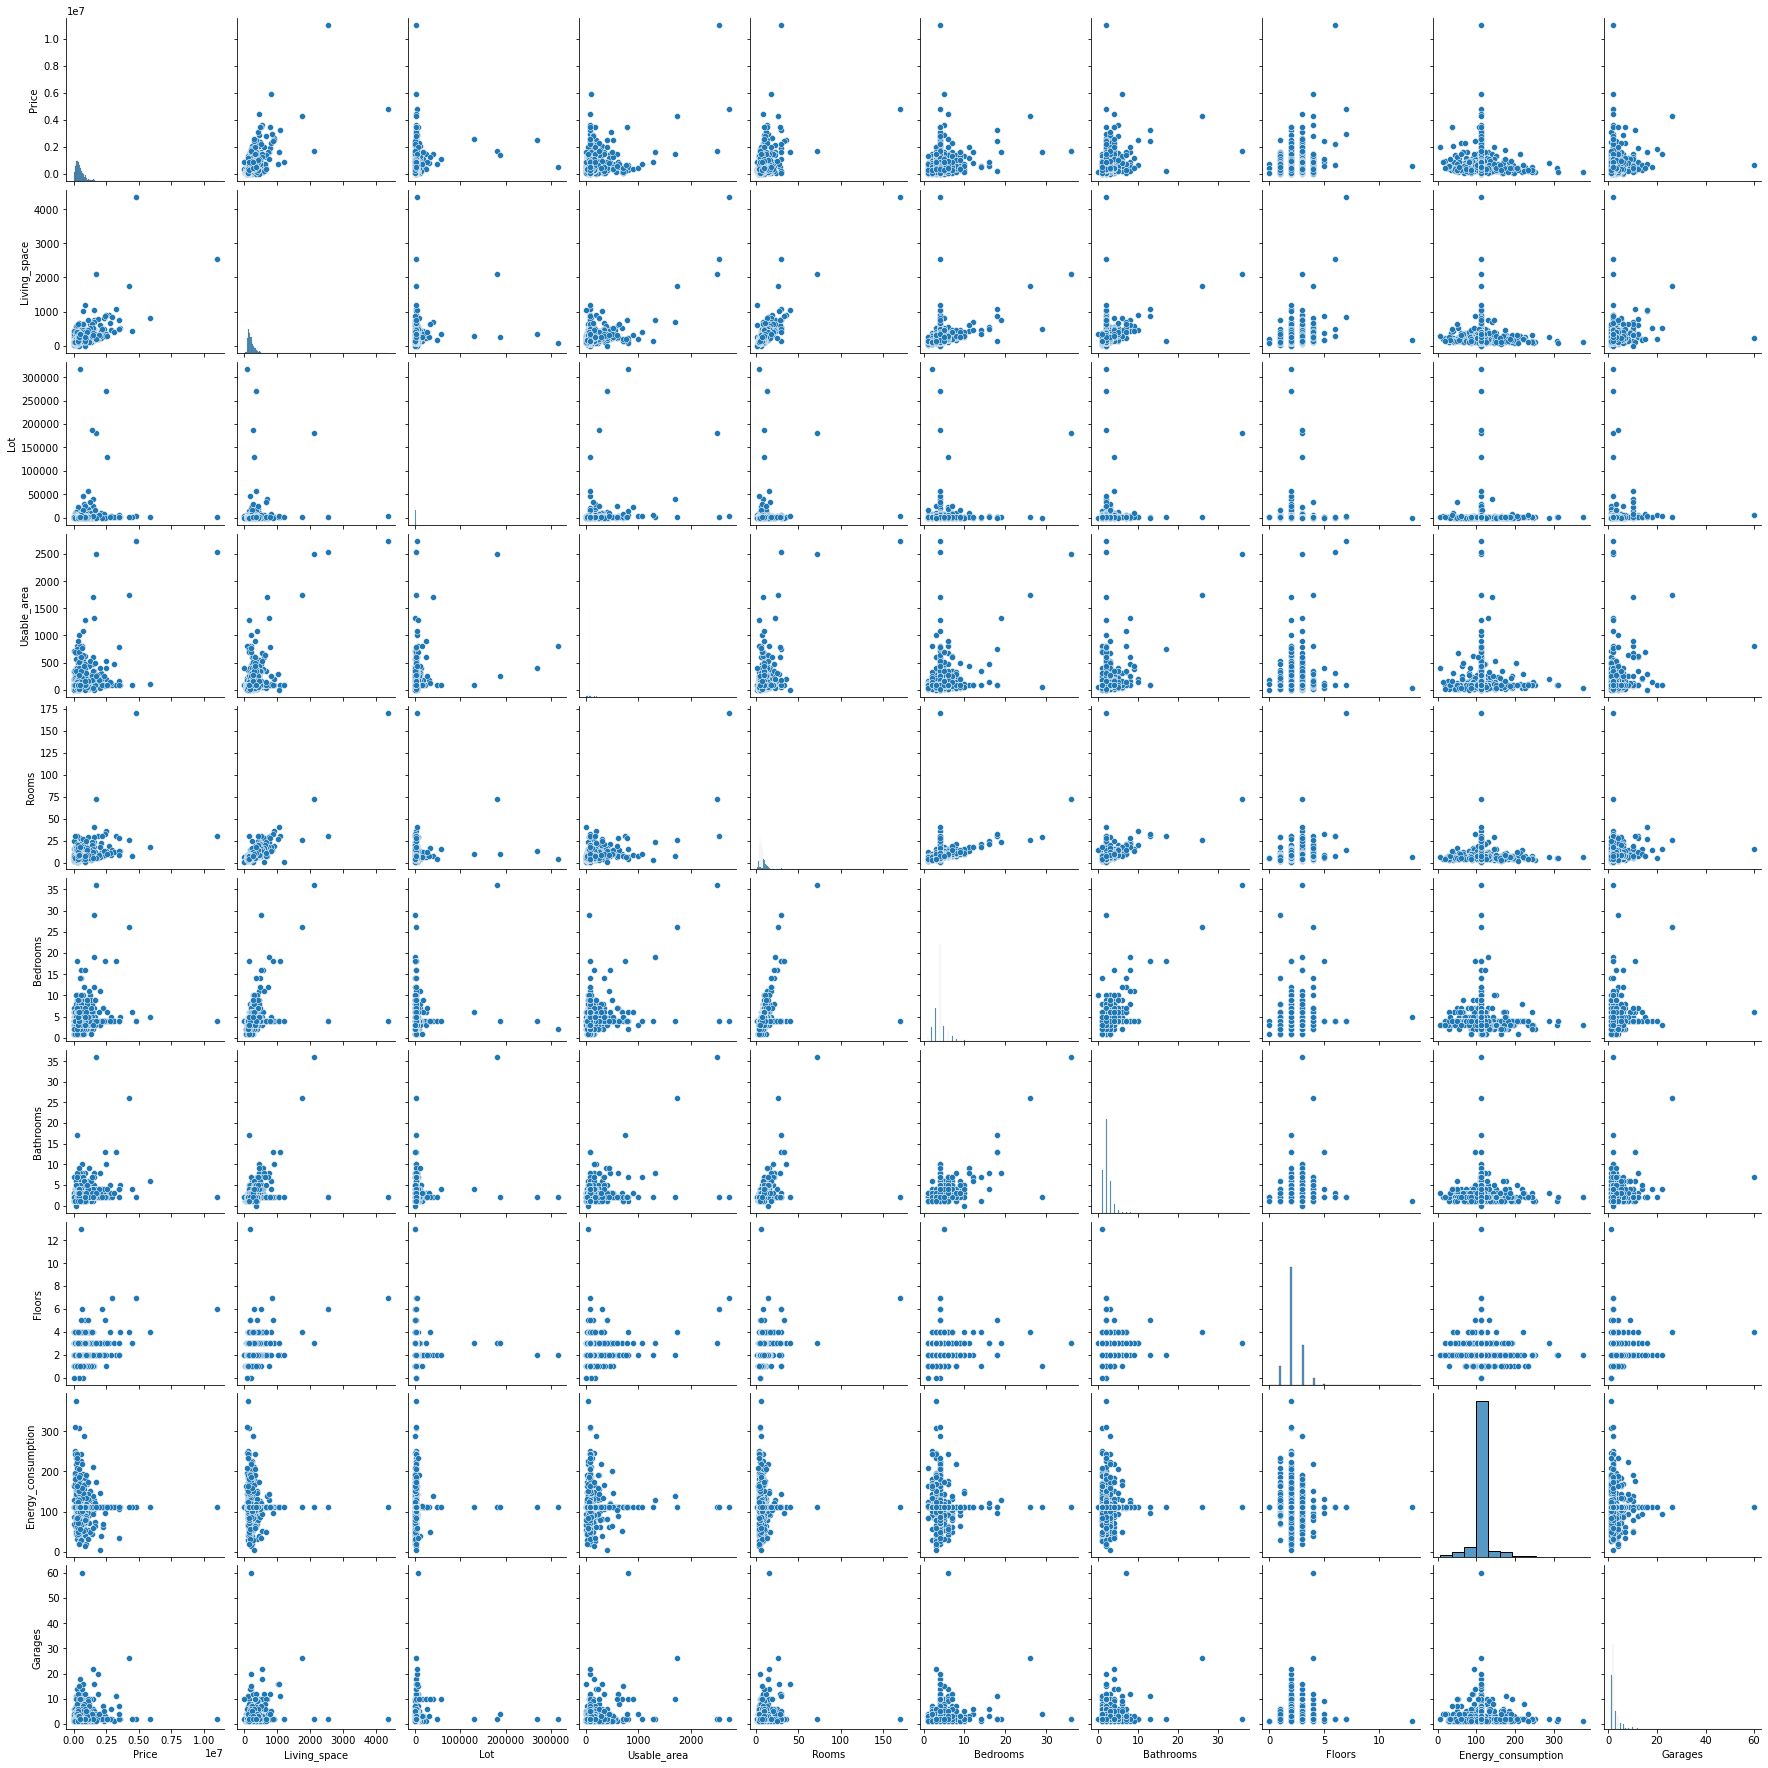

In [44]:
plt.figure()
sns.pairplot(GHD, vars = ['Price','Living_space','Lot','Usable_area','Rooms','Bedrooms','Bathrooms',
                          'Floors','Energy_consumption','Garages'])
plt.show()

In [45]:
feature_var = GHD.drop('Price',axis=1)
target_var=GHD['Price']

Xtrainrr_data, Xtestrr, ytrainrr, ytestrr = train_test_split(feature_var, target_var, random_state=0,test_size=0.25)



In [206]:
# scaling data for analysis
sclr = MinMaxScaler()

Xtrainrr = sclr.fit_transform(Xtrainrr_data)
Xtestrr = sclr.transform(Xtestrr)

Xtrainrr  = pd.DataFrame(Xtrainrr)
Xtestrr = pd.DataFrame(Xtestrr)
Xtrainrr.columns = feature_var.columns
Xtestrr.columns = feature_var.columns


# Bagging Regressor

### 1.Bagging on Decision Tree

#### Grid search for bagging regressor 

In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

paramgriddt = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5]}

bagdt = BaggingRegressor(DecisionTreeRegressor(max_depth = 2,max_leaf_nodes= 2))
baggriddt = GridSearchCV(bagdt, param_grid = paramgriddt, cv = 5, n_jobs = -1)
baggriddt.fit(Xtrainrr, ytrainrr)
print('Best Parameters:',baggriddt.best_params_)
print('Best Score:',baggriddt.best_score_)

Best Parameters: {'max_features': 0.5, 'max_samples': 0.1, 'n_estimators': 400}
Best Score: 0.21810562276025403


#### Grid search for decision tree

In [48]:
paramgridrr = {'max_leaf_nodes' : [2, 5, 10, 25, 50],
             'max_depth':[2,5,10,25,50]}

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
gridsearchrrdt = GridSearchCV( DecisionTreeRegressor(random_state = 0), paramgridrr, cv=5 )

gridsearchrrdt.fit(Xtrainrr, ytrainrr)
print("Best parameters: {}".format(gridsearchrrdt.best_params_))
print("Best cross score: {:.4f}".format(gridsearchrrdt.best_score_))

Best parameters: {'max_depth': 10, 'max_leaf_nodes': 10}
Best cross score: 0.2031


####  Applying Bagging on decision tree by find best parameters from grid search 

In [49]:
bagdt = BaggingRegressor(DecisionTreeRegressor(max_depth = 10, random_state = 0), 
                           bootstrap= True ,max_samples= baggriddt.best_params_['max_samples'],
                           n_estimators= baggriddt.best_params_['n_estimators'], oob_score= True)

bagdt.fit(Xtrainrr, ytrainrr)
preddt = bagdt.predict(Xtestrr)

print(' Train score: %.2f'%bagdt.score(Xtrainrr, ytrainrr))
print(' Test score: %.2f'%bagdt.score(Xtestrr, ytestrr))
print(' Out-of-bag score: %.2f'%bagdt.oob_score_)

 Train score: 0.49
 Test score: 0.40
 Out-of-bag score: 0.38


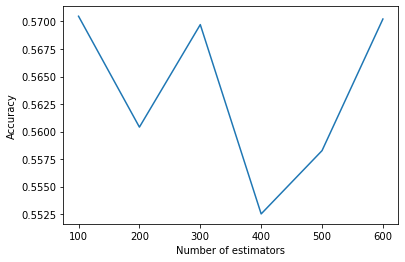

In [50]:
%matplotlib inline
estimators = [100,200,300,400,500,600]

accuracy = []

for n_estimators in estimators:
    bagdt = BaggingRegressor(DecisionTreeRegressor(max_depth=10),
                            max_samples=0.2,max_features= 0.5,
                            n_estimators=n_estimators)
    bagdt.fit(Xtrainrr, ytrainrr)
    acc = bagdt.score(Xtrainrr, ytrainrr)
    accuracy.append(acc)

plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

### 2. Bagging on Lasso

#### Grid search for Bagging 

In [51]:
from sklearn.linear_model import Lasso
paramgridls = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5]}

baggridls = BaggingRegressor(Lasso(alpha = 1000))
baggridls = GridSearchCV(baggridls, param_grid=paramgridls , cv = 5, n_jobs = -1)
baggridls.fit(Xtrainrr, ytrainrr)


print(' Best Parameters:',baggridls.best_params_)
print(' Best Score:',baggridls.best_score_)

 Best Parameters: {'max_features': 0.5, 'max_samples': 0.2, 'n_estimators': 500}
 Best Score: 0.4068107225273147


#### Grid search for Lasso 

In [52]:
paramgridrr = {'alpha' : [0.01,0.1,10,100,1000],}

from sklearn.model_selection import GridSearchCV

gridsearchrrls = GridSearchCV(Lasso(random_state = 0), paramgridrr, cv=5 )

gridsearchrrls.fit(Xtrainrr, ytrainrr)
print(" Best parameters: {}".format(gridsearchrrls.best_params_))
print("Best  score: {:.4f}".format(gridsearchrrls.best_score_))


 Best parameters: {'alpha': 1000}
Best  score: 0.3288


In [53]:
baglsregls = BaggingRegressor(Lasso(alpha = 1000), 
                           bootstrap= True, max_features=baggridls.best_params_['max_features'],max_samples= baggridls.best_params_['max_samples'],
                           n_estimators= baggridls.best_params_['n_estimators'], oob_score= True)

baglsregls.fit(Xtrainrr, ytrainrr)
predls = baglsregls.predict(Xtestrr)

print(' Train score: %.2f'%baglsregls.score(Xtrainrr, ytrainrr))
print(' Test score: %.2f'%baglsregls.score(Xtestrr, ytestrr))
print('Out-of-bag score: %.2f'%baglsregls.oob_score_)

 Train score: 0.46
 Test score: 0.35
Out-of-bag score: 0.39


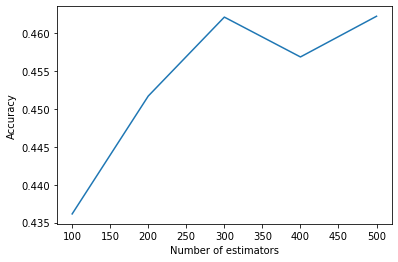

In [54]:
%matplotlib inline
estimators = [100,200,300,400,500]

accuracy = []

for n_estimators in estimators:
    clf = BaggingRegressor(Lasso(alpha = 1000),
                            max_samples=0.2,max_features= 0.5,n_estimators=n_estimators)
    clf.fit(Xtrainrr, ytrainrr)
    acc = clf.score(Xtrainrr, ytrainrr)
    accuracy.append(acc)

plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

# Pasting

### Pasting on Lasso

#### Grid search for pasting

In [55]:
from sklearn.linear_model import Lasso
paramgridls = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5]}

baggridpls = BaggingRegressor(Lasso(alpha = 1000))
baggridpls = GridSearchCV(baggridpls, param_grid=paramgridls , cv = 5, n_jobs = -1)
baggridpls.fit(Xtrainrr, ytrainrr)


print(' Best Parameters:',baggridpls.best_params_)
print(' Best Score:',baggridpls.best_score_)

 Best Parameters: {'max_features': 0.5, 'max_samples': 0.2, 'n_estimators': 200}
 Best Score: 0.4090307814727612


#### Grid search for Lasso to find best alpha

In [56]:
paramgridrr = {'alpha' : [0.01,0.1,10,100,1000],}

from sklearn.model_selection import GridSearchCV

gridsearchrrlsa = GridSearchCV(Lasso(random_state = 0), paramgridrr, cv=5 )

gridsearchrrlsa.fit(Xtrainrr, ytrainrr)
print(" Best parameters: {}".format(gridsearchrrlsa.best_params_))
print(" Best  score: {:.4f}".format(gridsearchrrlsa.best_score_))


 Best parameters: {'alpha': 1000}
 Best  score: 0.3288


#### Applying best parameters 

In [57]:
baglsa = BaggingRegressor(Lasso(alpha = 1000), 
                           bootstrap= False, max_features= 0.5,max_samples= 0.2,
                           n_estimators= 300)

baglsa.fit(Xtrainrr, ytrainrr)
predls = baglsa.predict(Xtestrr)

print(' Train score: %.2f'%baglsa.score(Xtrainrr, ytrainrr))
print(' Test score: %.2f'%baglsa.score(Xtestrr, ytestrr))


 Train score: 0.47
 Test score: 0.36


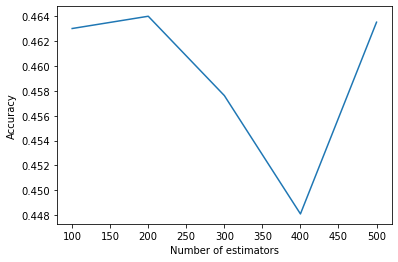

In [58]:
%matplotlib inline
estimators = [100,200,300,400,500]

accuracy = []

for n_estimators in estimators:
    bagls = BaggingRegressor(Lasso(alpha = 1000),
                            max_samples=0.2,max_features= 0.5,
                            n_estimators=n_estimators)
    bagls.fit(Xtrainrr, ytrainrr)
    acc = bagls.score(Xtrainrr, ytrainrr)
    accuracy.append(acc)

plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

####  Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [100, 200, 300, 500], 
              'max_samples':[0.1, 0.5, 1], 
              'max_features': [0.1, 0.2, 0.5, 1],
              'max_depth': [1, 2, 3, 5, 10]}
rnd_clf= RandomForestRegressor(random_state=0)
#bag_clf = BaggingRegressor(DecisionTreeRegressor(random_state = 0))
bag_grid = GridSearchCV(rnd_clf, param_grid = param_grid, cv = 5)
bag_grid.fit(Xtrainrr, ytrainrr)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 5, 10],
                         'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]})

In [60]:
print(" Best parameters: {}".format(bag_grid.best_params_))
print(" Best parameters: {}".format(bag_grid.best_score_))

 Best parameters: {'max_depth': 10, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}
 Best parameters: 0.40915417683819283


In [61]:
rf = RandomForestRegressor(max_depth = 10, max_features = 0.5, 
                            max_samples = 0.5, n_estimators = 500, random_state = 0,bootstrap= False)

rf.fit(Xtrainrr, ytrainrr)


print(' Train score: %.2f'%rf.score(Xtrainrr, ytrainrr))
print(' Test score: %.2f'%rf.score(Xtestrr, ytestrr))


 Train score: 0.86
 Test score: 0.45


([<matplotlib.axis.YTick at 0x7fb7d85cb9a0>,
 [Text(0, 0, 'Living_space'),
  Text(0, 1, 'Lot'),
  Text(0, 2, 'Usable_area'),
  Text(0, 3, 'Rooms'),
  Text(0, 4, 'Bedrooms'),
  Text(0, 5, 'Bathrooms'),
  Text(0, 6, 'Floors'),
  Text(0, 7, 'Energy_consumption'),
  Text(0, 8, 'Garages'),
  Text(0, 9, 'Type__Bungalow'),
  Text(0, 10, 'Type__Castle'),
  Text(0, 11, 'Type__Corner house'),
  Text(0, 12, 'Type__Duplex'),
  Text(0, 13, 'Type__Farmhouse'),
  Text(0, 14, 'Type__Mid-terrace house'),
  Text(0, 15, 'Type__Multiple dwelling'),
  Text(0, 16, 'Type__Residential property'),
  Text(0, 17, 'Type__Single dwelling'),
  Text(0, 18, 'Type__Special property'),
  Text(0, 19, 'Type__Villa'),
  Text(0, 20, 'quality__basic'),
  Text(0, 21, 'quality__luxus'),
  Text(0, 22, 'quality__normal'),
  Text(0, 23, 'quality__refined'),
  Text(0, 24, 'Condition__as new'),
  Text(0, 25, 'Condition__by arrangement'),
  Text(0, 26, 'Condition__dilapidated'),
  Text(0, 27, 'Condition__first occupation'),
  Text(

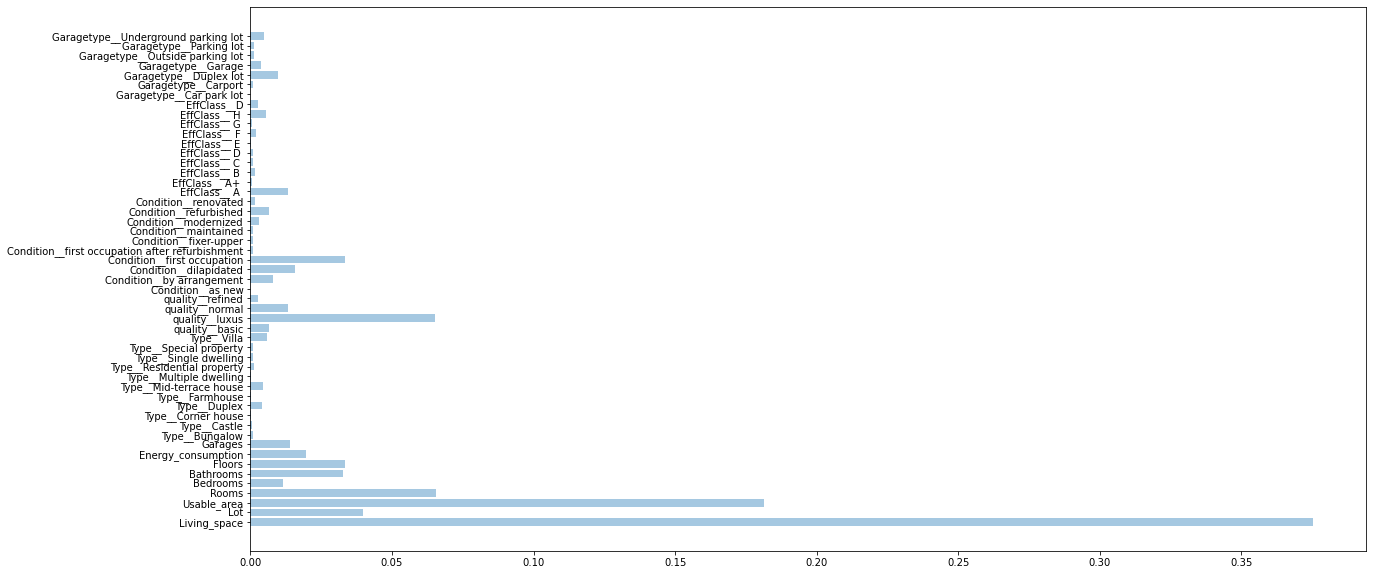

In [207]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.subplots(figsize = (20,10))
ylistrr = rf.feature_importances_
yposrr = np.arange(len(ylistrr))
features = Xtrainrr.columns
plt.barh(yposrr, ylistrr, align='center', alpha=0.4)
plt.yticks(yposrr, features)

# AdaBoostRegressor

### 1.AdaBoostRegressor on Decision tree

#### Grid search for AdaBoost Regression

In [63]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = {'n_estimators': [100,200,300,400,500] ,
              'learning_rate': [0.01,0.01,0.1,1]}

grid_ad = GridSearchCV(AdaBoostRegressor(), param_grid)
grid_ad.fit(Xtrainrr, ytrainrr)

print(' best parametes',grid_ad.best_params_)
print('best score',grid_ad.best_score_)

 best parametes {'learning_rate': 0.01, 'n_estimators': 500}
best score 0.2255267082521974


#### Grid search for decision tree

In [64]:
paramgridrr = {'max_leaf_nodes' : [2, 5, 10, 25, 50],
             'max_depth':[2,5,10,25,50]}

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
gridsearchrrad = GridSearchCV( DecisionTreeRegressor(random_state = 0), paramgridrr, cv=5 )

gridsearchrrad.fit(Xtrainrr, ytrainrr)
print("GridSearch on decision tree Best parameters: {}".format(gridsearchrrad.best_params_))
print("GridSearch on decision tree Best cross-validation score: {:.4f}".format(gridsearchrrad.best_score_))

GridSearch on decision tree Best parameters: {'max_depth': 10, 'max_leaf_nodes': 10}
GridSearch on decision tree Best cross-validation score: 0.2031


#### Using best parameters 

In [65]:
adadt = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 5, random_state = 0),
                          n_estimators=100, learning_rate=0.01, random_state=0)


adadt.fit(Xtrainrr, ytrainrr)
y_pred = adadt.predict(Xtestrr)

print(' Train score: %.2f'%adadt.score(Xtrainrr, ytrainrr))
print(' Test score: %.2f'%adadt.score(Xtestrr, ytestrr))


 Train score: 0.70
 Test score: 0.40


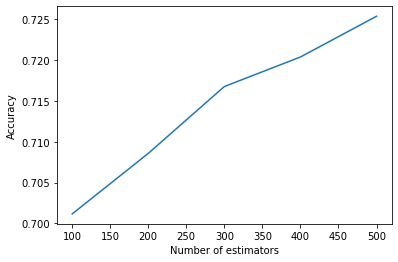

In [66]:
%matplotlib inline
estimators = [100,200,300,400,500]

accuracy = []

for n_estimators in estimators:
    adadt = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 5, random_state = 0),
                              learning_rate=0.01, random_state=0,n_estimators=n_estimators)
    adadt.fit(Xtrainrr, ytrainrr)
    acc = adadt.score(Xtrainrr, ytrainrr)
    accuracy.append(acc)

plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

([<matplotlib.axis.YTick at 0x7fb7d472ef40>,
 [Text(0, 0, 'Living_space'),
  Text(0, 1, 'Lot'),
  Text(0, 2, 'Usable_area'),
  Text(0, 3, 'Rooms'),
  Text(0, 4, 'Bedrooms'),
  Text(0, 5, 'Bathrooms'),
  Text(0, 6, 'Floors'),
  Text(0, 7, 'Energy_consumption'),
  Text(0, 8, 'Garages'),
  Text(0, 9, 'Type__Bungalow'),
  Text(0, 10, 'Type__Castle'),
  Text(0, 11, 'Type__Corner house'),
  Text(0, 12, 'Type__Duplex'),
  Text(0, 13, 'Type__Farmhouse'),
  Text(0, 14, 'Type__Mid-terrace house'),
  Text(0, 15, 'Type__Multiple dwelling'),
  Text(0, 16, 'Type__Residential property'),
  Text(0, 17, 'Type__Single dwelling'),
  Text(0, 18, 'Type__Special property'),
  Text(0, 19, 'Type__Villa'),
  Text(0, 20, 'quality__basic'),
  Text(0, 21, 'quality__luxus'),
  Text(0, 22, 'quality__normal'),
  Text(0, 23, 'quality__refined'),
  Text(0, 24, 'Condition__as new'),
  Text(0, 25, 'Condition__by arrangement'),
  Text(0, 26, 'Condition__dilapidated'),
  Text(0, 27, 'Condition__first occupation'),
  Text(

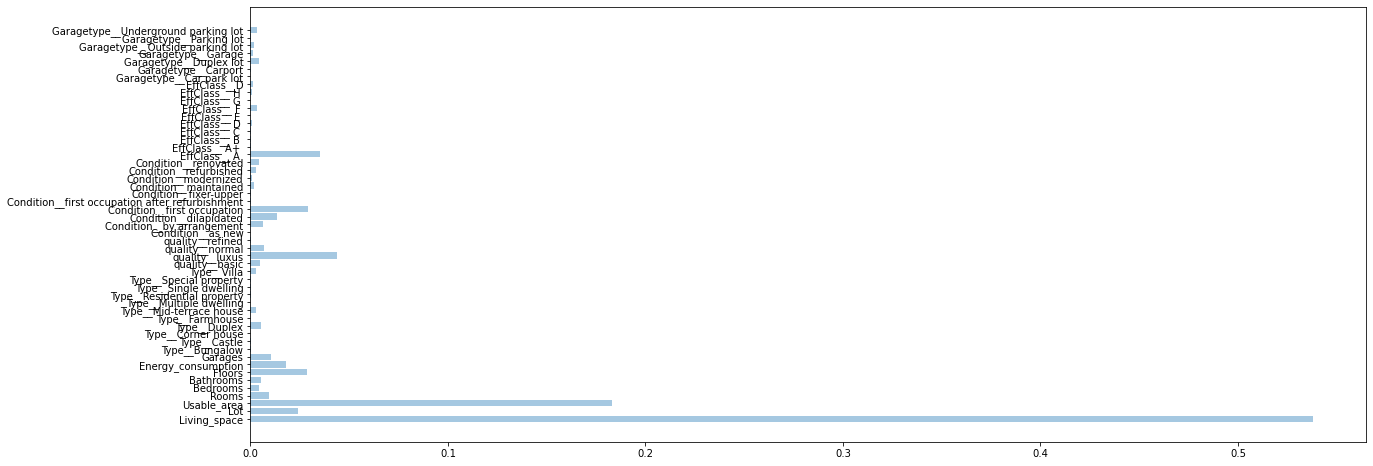

In [208]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.subplots(figsize = (20,8))
ylistrr = adadt.feature_importances_
yposrr = np.arange(len(ylistrr))
features = Xtestrr.columns
plt.barh(yposrr, ylistrr, align='center', alpha=0.4)
plt.yticks(yposrr, features)

### 2.AdaBoostRegressor on lasso

#### grid search for AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = {'n_estimators': [100,200,500,1000] ,
              'learning_rate': [0.01,0.01,0.1,1]}

grid_adr = GridSearchCV(AdaBoostRegressor(), param_grid)
grid_adr.fit(Xtrainrr, ytrainrr)

print(' best parametes',grid_adr.best_params_)
print('best score',grid_adr.best_score_)

 best parametes {'learning_rate': 0.01, 'n_estimators': 500}
best score 0.22235237325242857


#### Grid search for Lasso 

In [69]:
paramgridrr = {'alpha' : [0.01,0.1,10,100,1000],}

from sklearn.model_selection import GridSearchCV

gridsearchrrlso = GridSearchCV(Lasso(random_state = 0), paramgridrr, cv=5 )

gridsearchrrlso.fit(Xtrainrr, ytrainrr)
print(" Best parameters: {}".format(gridsearchrrlso.best_params_))
print(" Best score: {:.4f}".format(gridsearchrrlso.best_score_))


 Best parameters: {'alpha': 1000}
 Best score: 0.3288


#### using best parameters 

In [70]:
adals = AdaBoostRegressor(Lasso(alpha = 1000),
                          n_estimators=100, learning_rate=0.1, random_state=0)


adals.fit(Xtrainrr, ytrainrr)
y_pred = adals.predict(Xtestrr)

print(' Train score: %.2f'%adals.score(Xtrainrr, ytrainrr))
print('Test score: %.2f'%adals.score(Xtestrr, ytestrr))


 Train score: 0.53
Test score: 0.06


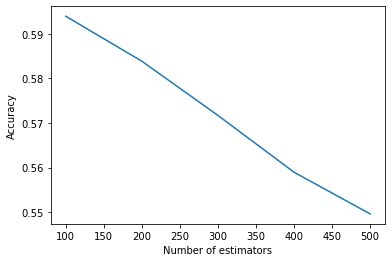

In [71]:
%matplotlib inline
estimators = [100,200,300,400,500]

accuracy = []

for n_estimators in estimators:
    adals = AdaBoostRegressor(Lasso(alpha=1000),
                              learning_rate=0.01, random_state=0,n_estimators=n_estimators)
    adals.fit(Xtrainrr, ytrainrr)
    acc = adals.score(Xtrainrr, ytrainrr)
    accuracy.append(acc)

plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

# GradientBoostingRegressor

#### Grid search for GradientBoosting

In [72]:
param_grid = {'max_depth':[1, 2, 5], 
              'n_estimators':[200, 500, 1000], 
              'learning_rate':[0.001, 0.01, 0.1] }


gb_clfgb= GradientBoostingRegressor()
grid_gb = GridSearchCV(gb_clfgb, param_grid, cv = 5, )
grid_gb.fit(Xtrainrr, ytrainrr)

print(" Best parameters: {}".format(grid_gb.best_params_))
print(" Best score: {}".format(grid_gb.best_score_))

 Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000}
 Best score: 0.3579791901657804


####  using best parametes with decision tree

In [73]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=0)
gbrt.fit(Xtrainrr, ytrainrr)
y_pred = gbrt.predict(Xtestrr)

print(' Train score: %.2f'%gbrt.score(Xtrainrr, ytrainrr))
print(' Test score: %.2f'%gbrt.score(Xtestrr, ytestrr))


 Train score: 0.79
 Test score: 0.39


([<matplotlib.axis.YTick at 0x7fb7d6a85d60>,
 [Text(0, 0, 'Living_space'),
  Text(0, 1, 'Lot'),
  Text(0, 2, 'Usable_area'),
  Text(0, 3, 'Rooms'),
  Text(0, 4, 'Bedrooms'),
  Text(0, 5, 'Bathrooms'),
  Text(0, 6, 'Floors'),
  Text(0, 7, 'Energy_consumption'),
  Text(0, 8, 'Garages'),
  Text(0, 9, 'Type__Bungalow'),
  Text(0, 10, 'Type__Castle'),
  Text(0, 11, 'Type__Corner house'),
  Text(0, 12, 'Type__Duplex'),
  Text(0, 13, 'Type__Farmhouse'),
  Text(0, 14, 'Type__Mid-terrace house'),
  Text(0, 15, 'Type__Multiple dwelling'),
  Text(0, 16, 'Type__Residential property'),
  Text(0, 17, 'Type__Single dwelling'),
  Text(0, 18, 'Type__Special property'),
  Text(0, 19, 'Type__Villa'),
  Text(0, 20, 'quality__basic'),
  Text(0, 21, 'quality__luxus'),
  Text(0, 22, 'quality__normal'),
  Text(0, 23, 'quality__refined'),
  Text(0, 24, 'Condition__as new'),
  Text(0, 25, 'Condition__by arrangement'),
  Text(0, 26, 'Condition__dilapidated'),
  Text(0, 27, 'Condition__first occupation'),
  Text(

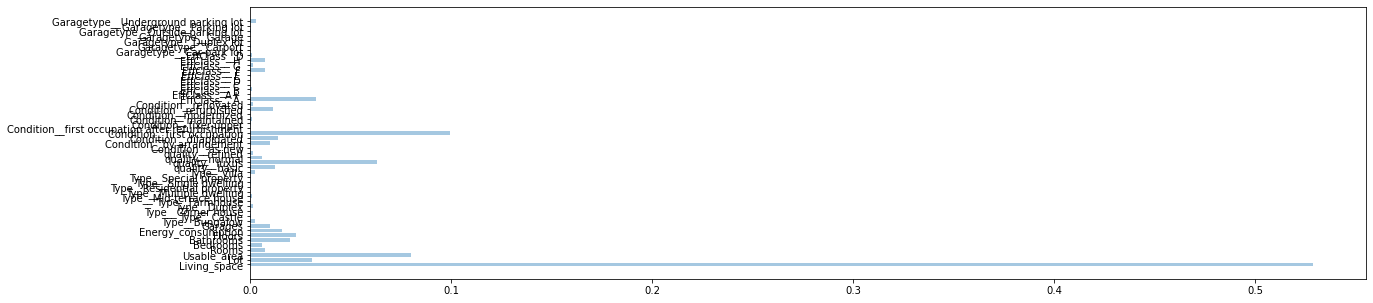

In [209]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.subplots(figsize = (20,5))
ylistrr = gbrt.feature_importances_
yposrr = np.arange(len(ylistrr))
features = Xtestrr.columns
plt.barh(yposrr, ylistrr, align='center', alpha=0.4)
plt.yticks(yposrr, features)

# PCA on all models

In [75]:
from sklearn.decomposition import PCA

pcarr = PCA(n_components = .95, random_state = 0)
Xtrainpca = pcarr.fit_transform(Xtrainrr)
Xtestpca = pcarr.transform(Xtestrr)

In [78]:
print("Number of attributes after PCA :" ,pcarr.n_components_ )

Number of attributes after PCA : 26


In [97]:
pcarr.components_

array([[-0.00372497, -0.00226257, -0.00444784, ..., -0.0232628 ,
         0.00324094, -0.00710047],
       [-0.00745611, -0.00306124, -0.01194906, ...,  0.20696819,
         0.30347385,  0.00829404],
       [ 0.01583592,  0.00232922,  0.00889588, ...,  0.05007777,
        -0.00293063,  0.00163803],
       ...,
       [-0.01643743, -0.01659738, -0.02237397, ..., -0.03628513,
        -0.01196865,  0.07552917],
       [-0.02554583, -0.01675036, -0.01546744, ..., -0.02090479,
         0.04363889, -0.00513972],
       [-0.00853293,  0.00166971, -0.00486516, ..., -0.00696666,
         0.00286008,  0.00641642]])

## KNN with PCA

#### Grid search for KNN

In [98]:
paramgridrr = {'n_neighbors': range(1,10)}
gridsearchpca = GridSearchCV(KNeighborsRegressor(), paramgridrr, cv=5, return_train_score=True, verbose = True)

gridsearchpca.fit(Xtrainpca, ytrainrr)


print(" Best parameters: {}".format(gridsearchpca.best_params_))
print("Best  score: {:.2f}".format(gridsearchpca.best_score_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
 Best parameters: {'n_neighbors': 9}
Best  score: -0.09


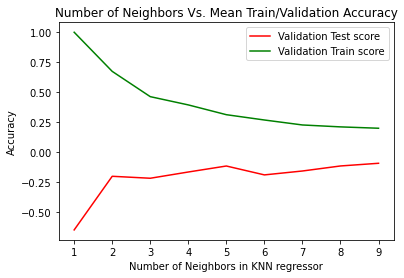

In [100]:
results = pd.DataFrame(gridsearchpca.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'],c='r',label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()

#### using best parameters 

In [101]:
knnrr = KNeighborsRegressor(n_neighbors=9)
knnrr.fit(Xtrainpca, ytrainrr)
ypredss = knnrr.predict(Xtestpca)
print('Train score  {:.3f}'.format(knnrr.score(Xtrainpca,ytrainrr)))
print('Test score  {:.3f}'.format(knnrr.score(Xtestpca,ytestrr)))

Train score  0.191
Test score  0.055


In [152]:
report_pca_table = [['KNN Regressor', 'K=9', knnrr.score(Xtrainpca,ytrainrr), knnrr.score(Xtestpca,ytestrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489]]

# PCA on # Linear Regression

#### Grid search for Linear Regression

In [104]:
linregrr=LinearRegression()
linregrr.fit(Xtrainpca, ytrainrr)

print(' Training score :',linregrr.score(Xtrainpca, ytrainrr))
print(' Testing score  :',linregrr.score(Xtestpca, ytestrr))
pred= linregrr.predict(Xtestpca)
print(f'\n Mean Squared Error: {np.sqrt(mean_squared_error(ytestrr, pred))} \n R2 Score: {r2_score(ytestrr,pred)}\n Mean Absolute Error: {mean_absolute_error(ytestrr,pred)}')


 Training score : 0.1870626856269203
 Testing score  : 0.20955642972713628

 Mean Squared Error: 438957.135445838 
 R2 Score: 0.20955642972713628
 Mean Absolute Error: 285926.7400902393


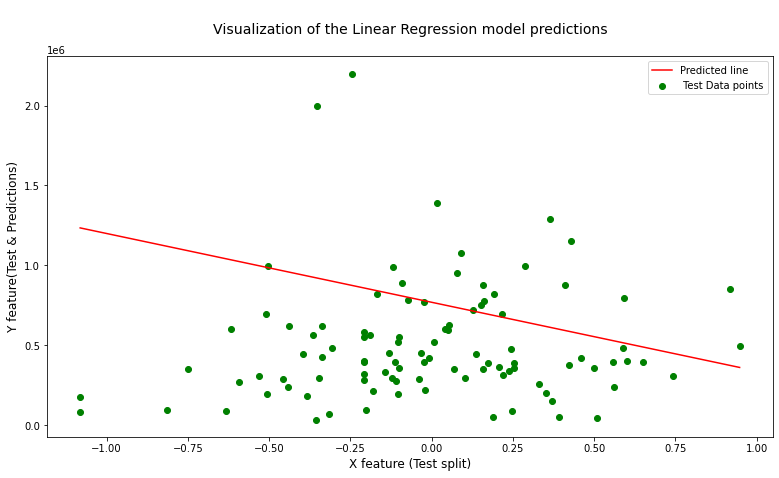

In [105]:
from sklearn.linear_model import LinearRegression

X_lr = Xtrainpca[:100,6].reshape(-1,1)
y_lr = ytrainrr[:100]
ln_reg=LinearRegression()
ln_reg.fit(X_lr, y_lr)
cm=pd.DataFrame({'x':Xtestpca[:100,6].tolist(),'y':ytestrr[:100].tolist()}).sort_values(by='x')
y_predict = ln_reg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label=' Test Data points', color='g')
plt.title('\nVisualization of the Linear Regression model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

In [153]:
report_pca_table += [['Linear Regression', '' ,
                      linregrr.score(Xtrainpca, ytrainrr), linregrr.score(Xtestpca, ytestrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628]]

# PCA with SGD

#### Gris dearch 

In [107]:
paramgridsg = {'eta0' : [0.001, 0.01, 0.1],
              'max_iter' : [1000, 5000, 10000]}


gridsearchrrsgd = GridSearchCV(SGDRegressor(random_state = 0), paramgridsg, cv=5 )

gridsearchrrsgd.fit(Xtrainpca, ytrainrr)


print("Grid search SGD with PCA Best parameters: {}".format(gridsearchrrsgd.best_params_))
print("Grid search SGD with PCA Best cross-validation score: {:.4f}".format(gridsearchrrsgd.best_score_))


Grid search SGD with PCA Best parameters: {'eta0': 0.001, 'max_iter': 1000}
Grid search SGD with PCA Best cross-validation score: 0.1665


#### using best parameters 

In [110]:
from sklearn.linear_model import SGDRegressor

sgdregrr = SGDRegressor(random_state= 0, max_iter = gridsearchrrsgd.best_params_['max_iter'], 
                       eta0 = gridsearchrrsgd.best_params_['eta0'], shuffle = False)
sgdregrr.fit(Xtrainpca, ytrainrr)

print('SGDRegressor with PCA  Train score: {:.4f}'.format(sgdregrr.score(Xtrainpca, ytrainrr)))
print('SGDRegressor with PCA Test score: {:.4f}'.format(sgdregrr.score(Xtrainpca, ytrainrr)))

SGDRegressor with PCA  Train score: 0.1865
SGDRegressor with PCA Test score: 0.1865


In [154]:
report_pca_table += [['SGD Regression', 'eta=0.001,max_iter=1000' ,
                      sgdregrr.score(Xtrainpca, ytrainrr), sgdregrr.score(Xtrainpca, ytrainrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628],
 ['SGD Regression',
  'eta=0.001,max_iter=1000',
  0.1864843431193679,
  0.1864843431193679]]

# PCA with Polynomial

#### Grid search 

In [112]:
degrees = [2,3,4,5] 
normalizes = [True, False]
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(Xtrainpca)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(Xtrainpca, ytrainrr)
        scores = cross_val_score(polynomial_regressor, Xtrainpca, ytrainrr, cv=5) 
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
            best_normalize = normalize

In [113]:
print("Best Score: ", best_score)
print("Best Normalize: ", best_normalize)
print("Best Degree: ", best_degree)

Best Score:  0.24679343976541968
Best Normalize:  True
Best Degree:  2


#### using best parameters 

In [115]:
print('Polynomial Regressor with PCA  Train score: {:.4f}'.format(best_polynomial_regressor.score(X_train_poly, ytrainrr)))
print('Polynomial Regressor PCA Test score: {:.4f}'.format(best_polynomial_regressor.score(X_test_poly, ytestrr)))

Polynomial Regressor with PCA  Train score: 0.6959
Polynomial Regressor PCA Test score: -10.3393


In [155]:
report_pca_table += [['Polynomial Regressor', 'degree=2' ,
                      best_polynomial_regressor.score(X_train_poly, ytrainrr), best_polynomial_regressor.score(X_test_poly, ytestrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628],
 ['SGD Regression',
  'eta=0.001,max_iter=1000',
  0.1864843431193679,
  0.1864843431193679],
 ['Polynomial Regressor', 'degree=2', 0.6958821848648604, -10.339342894205874]]

# PCA with Ridge

#### Grid search 

In [117]:


param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
grid_searchrdg = GridSearchCV(Ridge(), param_grid, cv=3, return_train_score=True)
grid_searchrdg.fit(Xtrainpca, ytrainrr)
print("Grid search PCA with Ridge Best parameters: {}".format(grid_searchrdg.best_params_))
print("Grid search PCA with Ridge Best cross-validation score using GridSeach: {:.2f}".format(grid_searchrdg.best_score_))

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100]}
Grid search PCA with Ridge Best parameters: {'alpha': 10}
Grid search PCA with Ridge Best cross-validation score using GridSeach: 0.16


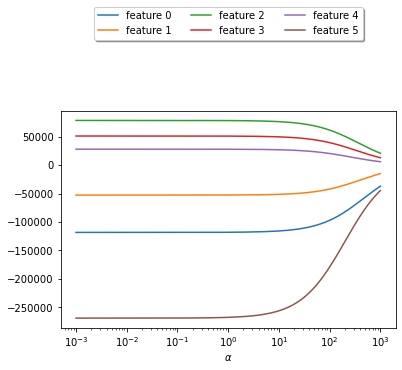

In [118]:
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(Xtrainpca,ytrainrr)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,6):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=10, xmax=999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

#### using best parameters 

In [119]:
### Ridge with best aplha value of 10
from  sklearn.linear_model import Ridge
best_ridge = Ridge(10)
scores = cross_val_score(best_ridge, Xtrainpca, ytrainrr, cv=5)
best_ridge.fit(Xtrainpca,ytrainrr)
y_pred_ridge=ridge.predict(Xtestpca)
print("PCA with Ridge Train score:",best_ridge.score(Xtrainpca,ytrainrr))
print("PCA with Ridge Test score:",best_ridge.score(Xtestpca, ytestrr))

PCA with Ridge Train score: 0.18550951010984784
PCA with Ridge Test score: 0.20694919318891392


In [156]:
report_pca_table += [['Ridge Regressor', 'alpha=10' ,
                      best_ridge.score(Xtrainpca,ytrainrr), best_ridge.score(Xtestpca, ytestrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628],
 ['SGD Regression',
  'eta=0.001,max_iter=1000',
  0.1864843431193679,
  0.1864843431193679],
 ['Polynomial Regressor', 'degree=2', 0.6958821848648604, -10.339342894205874],
 ['Ridge Regressor', 'alpha=10', 0.18550951010984784, 0.20694919318891392]]

# PCA with Lasso

#### Grid search 

In [121]:
param_grid = {'alpha': [ 0.00001,0.01,0.1,100,10000]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
grid_search_lasso = GridSearchCV(Lasso(random_state = 0), param_grid, cv=3, return_train_score=True)
grid_search_lasso.fit(Xtrainpca, ytrainrr)
print("PCA with Lasso Best parameters: {}".format(grid_search_lasso.best_params_))
print("PCA with Lasso Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

Parameter grid:
{'alpha': [1e-05, 0.01, 0.1, 100, 10000]}
PCA with Lasso Best parameters: {'alpha': 100}
PCA with Lasso Best cross-validation score: 0.16


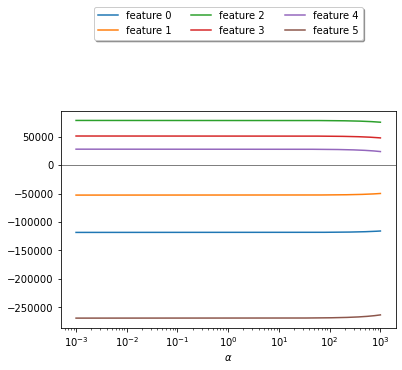

In [122]:
import numpy as np
from sklearn.linear_model import Lasso

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lass = Lasso(alpha)
    lass.fit(Xtrainpca,ytrainrr)
    coeff.append(lass.coef_ )
    
coeff = np.array(coeff)

for i in range(0,6):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

#### using best parameters 

In [123]:
from  sklearn.linear_model import Lasso
best_lasso = Lasso(100)
lasso_scores = cross_val_score(best_lasso, Xtrainpca, ytrainrr, cv=5)
best_lasso.fit(Xtrainpca,ytrainrr)
y_pred_lasso=best_lasso.predict(Xtestpca)
print("PCA with Lasso Train score:",best_lasso.score(Xtrainpca,ytrainrr))
print("PCA with Lasso Test score:",best_lasso.score(Xtestpca, ytestrr))

PCA with Lasso Train score: 0.18705234391371317
PCA with Lasso Test score: 0.20994620997878644


In [157]:
report_pca_table += [['Lasso Regressor', 'alpha=100' ,
                      best_lasso.score(Xtrainpca,ytrainrr), best_lasso.score(Xtestpca, ytestrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628],
 ['SGD Regression',
  'eta=0.001,max_iter=1000',
  0.1864843431193679,
  0.1864843431193679],
 ['Polynomial Regressor', 'degree=2', 0.6958821848648604, -10.339342894205874],
 ['Ridge Regressor', 'alpha=10', 0.18550951010984784, 0.20694919318891392],
 ['Lasso Regressor', 'alpha=100', 0.18705234391371317, 0.20994620997878644]]

# PCA with SVM

### 1. Linear SVR

In [125]:
from sklearn.svm import LinearSVR, SVR

crangerr = [0.01, 1, 10]

trainscorerr = []
testscorerr = []

for c in crangerr:
    lin_svr = LinearSVR(C = c)
    lin_svr.fit(Xtrainpca, ytrainrr)
    trainscorerr.append(lin_svr.score(Xtrainpca, ytrainrr))
    testscorerr.append(lin_svr.score(Xtestpca, ytestrr))

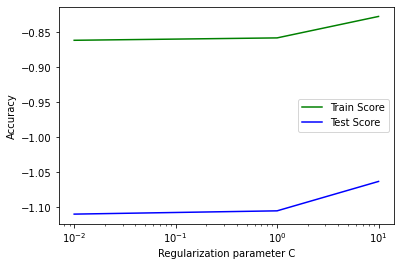

In [126]:
%matplotlib inline

plt.plot(crangerr, trainscorerr, label = 'Train Score', c = 'g')
plt.plot(crangerr, testscorerr, label = 'Test Score', c = 'b')
plt.xscale('log')
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()

#### Grid search 

In [127]:
from sklearn.svm import LinearSVR, SVR
param_grid_linearSVR = { 'max_iter' : range(1,1000),'C' : [ 0.01, 0.1,10,100]}
lin_svr = LinearSVR(C = 1, random_state=0)
CV_linearSVR_class = GridSearchCV(estimator = lin_svr, param_grid = param_grid_linearSVR ,cv = 3, verbose = 1, n_jobs = -1, return_train_score = True)
GS_results_linearSVR = CV_linearSVR_class.fit(Xtrainpca, ytrainrr)

best_parameters_linearSVR_class = CV_linearSVR_class.best_params_

Fitting 3 folds for each of 3996 candidates, totalling 11988 fits


In [128]:
print("Best score- PCA with Linear SVR grid serach: ",GS_results_linearSVR.best_score_)
print("Best parameters- PCA with Linear SVM grid serach: ",best_parameters_linearSVR_class)


Best score- PCA with Linear SVR grid serach:  -0.7419120618421059
Best parameters- PCA with Linear SVM grid serach:  {'C': 100, 'max_iter': 1}


#### using best parameters 

In [129]:
best_lin_SVR = LinearSVR(C = 100 ,max_iter = 1)
best_lin_SVR.fit(Xtrainpca, ytrainrr)
y_pred_SVR = best_lin_SVR.predict(Xtestpca)
 
print('PCA with Linear SVR grid search best parameter Train score: {:.6f} '.format(best_lin_SVR.score(Xtrainpca, ytrainrr)))
print('PCA with Linear SVR grid search best parameter Test score: {:.6f} '.format(best_lin_SVR.score(Xtestpca, ytestrr)))

PCA with Linear SVR grid search best parameter Train score: -0.564523 
PCA with Linear SVR grid search best parameter Test score: -0.705622 


In [158]:
report_pca_table += [['Linear SVR', 'C=100 , max_iter = 1', best_lin_SVR.score(Xtrainpca, ytrainrr), best_lin_SVR.score(Xtrainpca, ytrainrr) ]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628],
 ['SGD Regression',
  'eta=0.001,max_iter=1000',
  0.1864843431193679,
  0.1864843431193679],
 ['Polynomial Regressor', 'degree=2', 0.6958821848648604, -10.339342894205874],
 ['Ridge Regressor', 'alpha=10', 0.18550951010984784, 0.20694919318891392],
 ['Lasso Regressor', 'alpha=100', 0.18705234391371317, 0.20994620997878644],
 ['Linear SVR',
  'C=100 , max_iter = 1',
  -0.5645234670209167,
  -0.5645234670209167]]

#### 7. Kernelized Support Vector Regression

In [131]:
crangerr = [0.01, 0.1]

trainscorerr = []
testscorerr = []
for C in crangerr:
    
    kernal_clf = SVR(kernel = 'linear', C = C)
    kernal_clf.fit(Xtrainpca, ytrainrr) 
    trainscorerr.append(kernal_clf.score(Xtrainpca, ytrainrr))
    testscorerr.append(kernal_clf.score(Xtestpca, ytestrr))

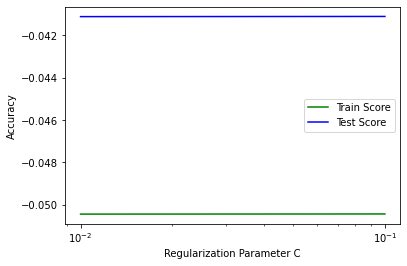

In [132]:
%matplotlib inline
plt.plot(crangerr, trainscorerr, label = 'Train Score', c = 'g')
plt.plot(crangerr, testscorerr, label = 'Test Score', c='b')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')

plt.legend()

In [133]:
kernal_clf = SVR(kernel = 'linear', C = 0.01)
kernal_clf.fit(Xtrainpca, ytrainrr) 
print("PCA with kernelized SVR train score {:.6f} ".format(kernal_clf.score(Xtrainpca, ytrainrr)))
print("PCA with kernelized SVR test score: {:.6f} ".format(kernal_clf.score(Xtestpca, ytestrr)))

PCA with kernelized SVR train score -0.050446 
PCA with kernelized SVR test score: -0.041125 


#### Grid search 

In [134]:
from sklearn.model_selection import GridSearchCV
kernelSVR_params = {'C':[0.01, 0.1,10],'gamma':[0.01, 0.1,10], 'kernel':['rbf','poly','linear']}
KernelSVR = SVR(max_iter=3000)
GS_KernelSVR = GridSearchCV(KernelSVR, kernelSVR_params, cv = 3, return_train_score= True, n_jobs= -1, verbose=10)
GS_KernelSVR.fit(Xtrainpca,ytrainrr)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=SVR(max_iter=3000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 10], 'gamma': [0.01, 0.1, 10],
                         'kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True, verbose=10)

In [135]:
print("Best score- Kernelized SVR grid search: ",GS_KernelSVR.best_score_)
print("Best parameters- Kernelized SVR grid search: ",GS_KernelSVR.best_params_)


Best score- Kernelized SVR grid search:  0.07965599623778001
Best parameters- Kernelized SVR grid search:  {'C': 10, 'gamma': 10, 'kernel': 'poly'}


### Kernel Type : 'Linear'

In [136]:
best_svr_linear = SVR(C = 10, gamma = 10, kernel= 'linear', verbose = True)

best_svr_linear.fit(Xtrainpca,ytrainrr)
y_pred_kernel_linear = best_svr_linear.predict(Xtestpca)

print('PCA with linear kernel Train score: {:.6f} '.format(best_svr_linear.score(Xtrainpca,ytrainrr)))
print('PCA with linear kernel Test score: {:.6f} '.format(best_svr_linear.score(Xtestpca, ytestrr)))

[LibSVM]PCA with linear kernel Train score: -0.049495 
PCA with linear kernel Test score: -0.040062 


In [159]:
report_pca_table += [['SVR with kernel type = Linear', 'C=10, gamma = 10', 
                      best_svr_linear.score(Xtrainpca,ytrainrr), best_svr_linear.score(Xtestpca, ytestrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628],
 ['SGD Regression',
  'eta=0.001,max_iter=1000',
  0.1864843431193679,
  0.1864843431193679],
 ['Polynomial Regressor', 'degree=2', 0.6958821848648604, -10.339342894205874],
 ['Ridge Regressor', 'alpha=10', 0.18550951010984784, 0.20694919318891392],
 ['Lasso Regressor', 'alpha=100', 0.18705234391371317, 0.20994620997878644],
 ['Linear SVR',
  'C=100 , max_iter = 1',
  -0.5645234670209167,
  -0.5645234670209167],
 ['SVR with kernel type = Linear',
  'C=10, gamma = 10',
  -0.050421150468424436,
  -0.04111249896066771]]

### Kernel Type : 'poly'

In [138]:
best_svr_linear = SVR(C = 10, gamma = 10, kernel= 'poly', verbose = True)

best_svr_linear.fit(Xtrainpca,ytrainrr)
y_pred_kernel_linear = best_svr_linear.predict(Xtestpca)

print('PCA with poly kernel Train score: {:.6f} '.format(best_svr_linear.score(Xtrainpca,ytrainrr)))
print('PCA with poly kernel Test score: {:.6f} '.format(best_svr_linear.score(Xtrainpca,ytrainrr)))

[LibSVM]PCA with poly kernel Train score: 0.233984 
PCA with poly kernel Test score: 0.233984 


In [160]:
report_pca_table += [['SVR with kernel type = poly', 'C=10, gamma = 10', 
                      best_svr_linear.score(Xtrainpca,ytrainrr), best_svr_linear.score(Xtestpca, ytestrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628],
 ['SGD Regression',
  'eta=0.001,max_iter=1000',
  0.1864843431193679,
  0.1864843431193679],
 ['Polynomial Regressor', 'degree=2', 0.6958821848648604, -10.339342894205874],
 ['Ridge Regressor', 'alpha=10', 0.18550951010984784, 0.20694919318891392],
 ['Lasso Regressor', 'alpha=100', 0.18705234391371317, 0.20994620997878644],
 ['Linear SVR',
  'C=100 , max_iter = 1',
  -0.5645234670209167,
  -0.5645234670209167],
 ['SVR with kernel type = Linear',
  'C=10, gamma = 10',
  -0.050421150468424436,
  -0.04111249896066771],
 ['SVR with kernel type = poly',
  'C=10, gamma = 10',
  -0.050421150468424436,
  -0.04111249896066771]]

### Kernel Type : 'rbf'

In [140]:
best_svr_linear = SVR(C = 10, gamma = 10, kernel= 'rbf', verbose = True)

best_svr_linear.fit(Xtrainpca,ytrainrr)
y_pred_kernel_linear = best_svr_linear.predict(Xtestpca)

print('PCA with rbf kernel Train score: {:.6f} '.format(best_svr_linear.score(Xtrainpca,ytrainrr)))
print('PCA with rbf kernel Test score: {:.6f} '.format(best_svr_linear.score(Xtestpca, ytestrr)))

[LibSVM]PCA with rbf kernel Train score: -0.050421 
PCA with rbf kernel Test score: -0.041112 


In [161]:
report_pca_table += [['SVR with kernel type = rbf', 'C=10, gamma = 10', 
                      best_svr_linear.score(Xtrainpca,ytrainrr), best_svr_linear.score(Xtestpca, ytestrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628],
 ['SGD Regression',
  'eta=0.001,max_iter=1000',
  0.1864843431193679,
  0.1864843431193679],
 ['Polynomial Regressor', 'degree=2', 0.6958821848648604, -10.339342894205874],
 ['Ridge Regressor', 'alpha=10', 0.18550951010984784, 0.20694919318891392],
 ['Lasso Regressor', 'alpha=100', 0.18705234391371317, 0.20994620997878644],
 ['Linear SVR',
  'C=100 , max_iter = 1',
  -0.5645234670209167,
  -0.5645234670209167],
 ['SVR with kernel type = Linear',
  'C=10, gamma = 10',
  -0.050421150468424436,
  -0.04111249896066771],
 ['SVR with kernel type = poly',
  'C=10, gamma = 10',
  -0.050421150468424436,
  -0.04111249896066771],
 ['SVR with kernel type = rbf',
  'C=10, gamma = 10',
  -0.050421150468424436,
  -0.04111249896066771]]

# Decision tree

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

dectree = DecisionTreeRegressor(random_state = 0)
#define a list of parameters
dectree_parameter = {"max_depth": range(1,10),
               "min_samples_split": range(2,10,1),
               "max_leaf_nodes": range(2,5)}

#apply grid search
dectree_grid = GridSearchCV(dectree, dectree_parameter, cv=5,n_jobs=-1,return_train_score = True,scoring='r2')
dectree_grid.fit(Xtrainpca, ytrainrr)

#find best parameters
print("PCA decision tree Best Mean Cross-validation score: {:}".format(dectree_grid.best_score_))
print('PCA decision tree Best Parameters: ', dectree_grid.best_params_)



PCA decision tree Best Mean Cross-validation score: 0.038684690798269486
PCA decision tree Best Parameters:  {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}


In [143]:
# Check data set performance
print("PCA Decision Tree Train Performance: ", dectree_grid.score(Xtrainpca,ytrainrr))
print("PCA Decision Tree Test Performance: ", dectree_grid.score(Xtestpca,ytestrr))
print('PCA Validation score is: ' ,dectree_grid.score(Xtestpca,ytestrr))

PCA Decision Tree Train Performance:  0.06086936431291923
PCA Decision Tree Test Performance:  0.007491721799499529
PCA Validation score is:  0.007491721799499529


In [144]:
### applying best parameters
best_dtree = DecisionTreeRegressor(max_depth = 3, min_samples_split = 2, max_leaf_nodes=4)

best_dtree.fit(Xtrainpca, ytrainrr)
y_pred_dtree = best_dtree.predict(Xtestpca)

print('PCA decision tree Train score: {:.6f} '.format(best_dtree.score(Xtrainpca,ytrainrr)))
print('PCA decision tree Test score: {:.6f} '.format(best_dtree.score(Xtestpca, ytestrr)))

PCA decision tree Train score: 0.251180 
PCA decision tree Test score: 0.029258 


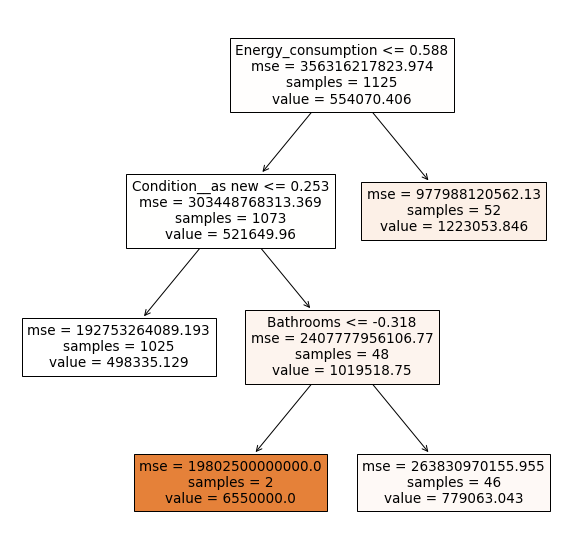

In [145]:
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(best_dtree, feature_names=GHD.columns, filled=True)

In [162]:
report_pca_table += [['Decision Tree', 'max_depth=3', 
                      best_dtree.score(Xtrainpca,ytrainrr), best_dtree.score(Xtestpca, ytestrr)]]
report_pca_table

[['KNN Regressor', 'K=9', 0.1912299010261066, 0.05549723464055489],
 ['Linear Regression', '', 0.1870626856269203, 0.20955642972713628],
 ['SGD Regression',
  'eta=0.001,max_iter=1000',
  0.1864843431193679,
  0.1864843431193679],
 ['Polynomial Regressor', 'degree=2', 0.6958821848648604, -10.339342894205874],
 ['Ridge Regressor', 'alpha=10', 0.18550951010984784, 0.20694919318891392],
 ['Lasso Regressor', 'alpha=100', 0.18705234391371317, 0.20994620997878644],
 ['Linear SVR',
  'C=100 , max_iter = 1',
  -0.5645234670209167,
  -0.5645234670209167],
 ['SVR with kernel type = Linear',
  'C=10, gamma = 10',
  -0.050421150468424436,
  -0.04111249896066771],
 ['SVR with kernel type = poly',
  'C=10, gamma = 10',
  -0.050421150468424436,
  -0.04111249896066771],
 ['SVR with kernel type = rbf',
  'C=10, gamma = 10',
  -0.050421150468424436,
  -0.04111249896066771],
 ['Decision Tree', 'max_depth=3', 0.2511802405403717, 0.02925779658001404]]

### Report with PCA

In [164]:
report_with_pca = pd.DataFrame(report_pca_table,columns = ['Model Name','Model Parameter', 'Train Score', 'Test Score'])
# report_with_pca.index = report_with_pca['Model name']

report_with_pca.round(3)

,Model Name,Model Parameter,Train Score,Test Score
0,KNN Regressor,K=9,0.191,0.055
1,Linear Regression,,0.187,0.210
2,SGD Regression,"eta=0.001,max_iter=1000",0.186,0.186
3,Polynomial Regressor,degree=2,0.696,-10.339
4,Ridge Regressor,alpha=10,0.186,0.207
5,Lasso Regressor,alpha=100,0.187,0.210
6,Linear SVR,"C=100 , max_iter = 1",-0.565,-0.565
7,SVR with kernel type = Linear,"C=10, gamma = 10",-0.050,-0.041
8,SVR with kernel type = poly,"C=10, gamma = 10",-0.050,-0.041
9,SVR with kernel type = rbf,"C=10, gamma = 10",-0.050,-0.041


### Report without PCA 

In [165]:
report_table = [['KNN Regressor', 'K=17', 0.2581, 0.2455]]
report_table += [['Linear Regressor', '', 0.5816, 0.3104]]
report_table += [['Ridge Regressor', 'Alpha = 10', 0.5730,0.3199]]
report_table += [['Lasso Regression', 'Alpha = 1000', 0.5508, 0.3610]]
report_table += [['Polynomial Regression', 'degree=2', 0.9219, -8391]]
report_table += [['Linear SVR', 'C=0.01 , max_iter = 1000', 0.4667, 0.2941]]
report_table += [['SVR with kernel type = rbf', 'C=1000, gamma = 0.01', 0.241, 0.219]]
report_table += [['SVR with kernel type = linear', 'C=1000, gamma = 0.01', 0.1348,0.1623]]
report_table += [['SVR with kernel type = Poly', 'C=1000, gamma = 0.01', -0.0325, -0.0214]]
report_table += [['Decision Tree Regressor', 'Max depth =10', 0.02697, -0.0017]]

In [166]:
report = pd.DataFrame(report_table,columns = ['Model Name','Model Parameter','Train Score', 'Test Score'])
# report.index = report['Model name']
report

,Model Name,Model Parameter,Train Score,Test Score
0,KNN Regressor,K=17,0.25810,0.2455
1,Linear Regressor,,0.58160,0.3104
2,Ridge Regressor,Alpha = 10,0.57300,0.3199
3,Lasso Regression,Alpha = 1000,0.55080,0.3610
4,Polynomial Regression,degree=2,0.92190,-8391.0000
5,Linear SVR,"C=0.01 , max_iter = 1000",0.46670,0.2941
6,SVR with kernel type = rbf,"C=1000, gamma = 0.01",0.24100,0.2190
7,SVR with kernel type = linear,"C=1000, gamma = 0.01",0.13480,0.1623
8,SVR with kernel type = Poly,"C=1000, gamma = 0.01",-0.03250,-0.0214
9,Decision Tree Regressor,Max depth =10,0.02697,-0.0017


#### As can be seen from the tables above, the Test scores for all the models have dropped after applying PCA. The least drop is shown by Lasso Regressor.

# Deep learning 

## With PCA

#### Grid search 

In [174]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy
from keras.wrappers.scikit_learn import KerasRegressor

In [175]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=51, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [176]:
model = KerasRegressor(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_searchdpl = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [177]:
grid_search_resultdpl = grid_searchdpl.fit(Xtrainrr, ytrainrr)

In [191]:
print("Grid Search deep learning Best parameter:{:}".format(grid_search_resultdpl.best_params_))
print("Grid Search deep learning Best score: {:}".format(grid_search_resultdpl.best_score_))


Grid Search deep learning Best parameter:{'batch_size': 10, 'epochs': 100}
Grid Search deep learning Best score: 244206862336.0


In [192]:
# create model
modelss = Sequential()
modelss.add(Dense(12, input_dim=26, activation='relu'))
modelss.add(Dense(8, activation='relu'))
modelss.add(Dense(1, activation='sigmoid'))

In [193]:
modelss.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [194]:
modelss.fit(Xtrainpca, ytrainrr, epochs = 100, batch_size = 10)

Epoch 1/100
113/113 [==============================] - 1s 3ms/step - loss: 549347269649.9649 - mse: 549347261026.8070
Epoch 2/100
113/113 [==============================] - 0s 2ms/step - loss: 539837898320.8421 - mse: 539837897889.6842
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 498657525185.1228 - mse: 498657513112.7018
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 671072879454.3158 - mse: 671072879454.3158
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 1075872007293.7544 - mse: 1075872007293.7544
Epoch 6/100
113/113 [==============================] - 0s 3ms/step - loss: 559768040645.6140 - mse: 559768040645.6140
Epoch 7/100
113/113 [==============================] - 0s 3ms/step - loss: 474480850261.3333 - mse: 474480845087.4386
Epoch 8/100
113/113 [==============================] - 0s 3ms/step - loss: 662292116390.1754 - mse: 662292116390.1754
Epoch 9/100
113/113 [==============================] -

In [195]:
modelss.evaluate(Xtestpca,ytestrr)

12/12 [==============================] - 0s 2ms/step - loss: 514296020992.0000 - mse: 514296020992.0000


[514296020992.0, 514296020992.0]

In [198]:
y_train_predict_grid = modelss.predict(Xtrainpca)
y_test_predict_grid = modelss.predict(Xtestpca)

## Without PCA

In [199]:
# create model
modelss1 = Sequential()
modelss1.add(Dense(12, input_dim=51, activation='relu'))
modelss1.add(Dense(8, activation='relu'))
modelss1.add(Dense(1, activation='sigmoid'))

In [200]:
modelss1.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [201]:
modelss1.fit(Xtrainrr, ytrainrr, epochs = 100, batch_size = 10)

Epoch 1/100
113/113 [==============================] - 1s 3ms/step - loss: 650041579412.2106 - mse: 650041579412.2106
Epoch 2/100
113/113 [==============================] - 0s 2ms/step - loss: 571217977200.2808 - mse: 571217977200.2808
Epoch 3/100
113/113 [==============================] - 0s 2ms/step - loss: 564139330218.6666 - mse: 564139342865.9650
Epoch 4/100
113/113 [==============================] - 0s 2ms/step - loss: 562535137854.8772 - mse: 562535137854.8772
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 629723449308.0702 - mse: 629723449020.6316
Epoch 6/100
113/113 [==============================] - 0s 2ms/step - loss: 568999130884.4912 - mse: 568999144681.5438
Epoch 7/100
113/113 [==============================] - 0s 2ms/step - loss: 544817620812.3509 - mse: 544817620812.3509
Epoch 8/100
113/113 [==============================] - 0s 2ms/step - loss: 538487270920.9825 - mse: 538487270920.9825
Epoch 9/100
113/113 [==============================] - 0

In [202]:
modelss1.evaluate(Xtestrr,ytestrr)

12/12 [==============================] - 0s 1ms/step - loss: 514296020992.0000 - mse: 514296020992.0000


[514296020992.0, 514296020992.0]

In [203]:
y_train_predict_grid = modelss1.predict(Xtrainrr)
y_test_predict_grid = modelss1.predict(Xtestrr)

In [205]:
print("Grid Search deep learning Train score :{:}".format(grid_search_resultdpl.score(Xtrainrr, ytrainrr)))
print("Grid Search deep learning Test score :{:}".format(grid_search_resultdpl.score(Xtestrr, ytestrr)))

Grid Search deep learning Train score :303704997888.0
Grid Search deep learning Test score :282644807680.0
